In [290]:
%matplotlib inline
import random as rnd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [291]:
# csvをデータフレームとして読み込み
train_df = pd.read_csv('csv/train.csv')
test_df = pd.read_csv('csv/test.csv')
combine = [train_df, test_df]

In [292]:
# trainデータフレームのカラム確認
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [293]:
# trainデータフレームの先頭5行を確認
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Categoricalデータ：  
- Categorical  
  - Survived, Sex, Embarked  
- Ordinal  
  - Pclass  

Numericalデータ：  
- Continuout  
  - Age, Fare  
- Discreate  
  - SibSp, Parch  

In [294]:
# trainデータフレームの末尾5行を確認
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [295]:
# trainデータフレームとtestデータフレームの総合情報を確認
# =>
# Cabin, Age, Embarked に欠損データあり
# 7要素がint型、5要素がstring型
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [296]:
# trainデータフレームの基本統計量を確認
# =>
# 38%くらいの生存率、2/3以上の人は1人で乗船している
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [297]:
# trainデータフレームのオブジェクトデータ(srt型等)に関する情報を取得  
# cont: データ数, unique: 重複を排除したデータ数, top: 最も多く含まれるデータ, freq: そのデータが含まれる個数
# =>
# 同性同名はいない
# 65%くらいが男性
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


---------------------
- データの確認把握  
- 欠損データの補完  
 - Age  
 - Embarked  
- データの精査(削除)  
 - Ticketは22%が重複しているので関係なさそう  
 - Cabinは欠損データが多すぎて補完仕切れない  
 - PassengerIdとNameも生存率には関係なさそう  
- 既存のデータから新しいデータの作成  
 - SibSpとParchから同乗者でカラムが作れそう  
 - NameのTitle(MrとかMsとか)からカラムが作れそう  
 - AgeをOrdinalデータにできそう  
 - FareもAge同様  
- データから読み取った結果をもとに分類の追加  
 - 女性のが生存率高い  
 - 子供のが生存率高い  
 - 上流階級のが生存率高い  
---------------------

以下どの要素が生存率と関連性があるかを調べる

In [298]:
# チケットのクラスと生存率の関連性
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [299]:
# 性別と生存率の関連性
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [300]:
# 同乗している兄弟・配偶者の数と生存率の関係性
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [301]:
# 同乗している親・子供の数と生存率の関係性
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


以下グラフによる生存率のその他要素の関連性の可視化

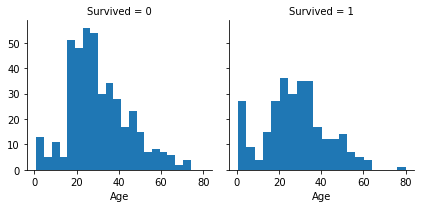

In [302]:
# Numericalデータの比較
# 年齢と生存率の関連性
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

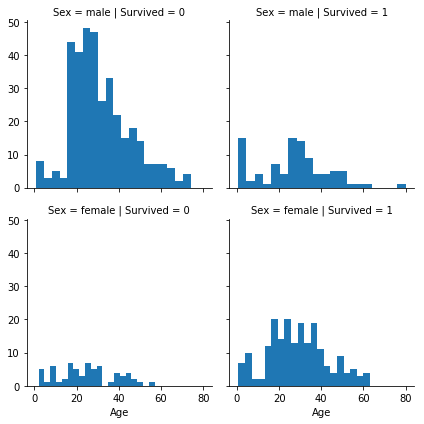

In [303]:
# Numericalデータの比較
# 年齢と性別と生存率の比較
g = sns.FacetGrid(train_df, col='Survived', row='Sex')
g.map(plt.hist, 'Age', bins=20)
grid.add_legend()

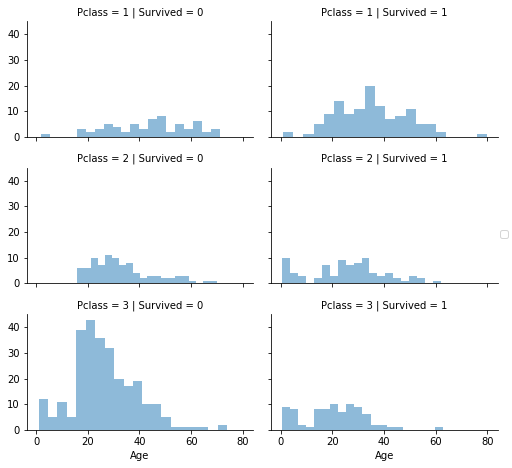

In [304]:
# 年齢、チケットのクラスと生存率の関連性
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/Users/d_ando/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/d_ando/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


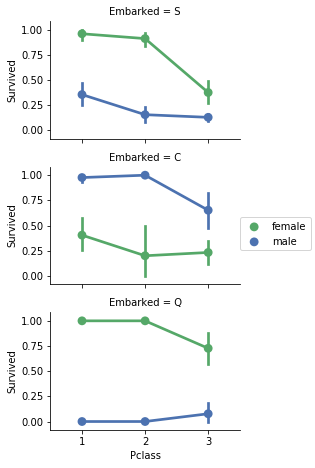

In [305]:
# 出航港、性別と生存率の関連性
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/d_ando/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


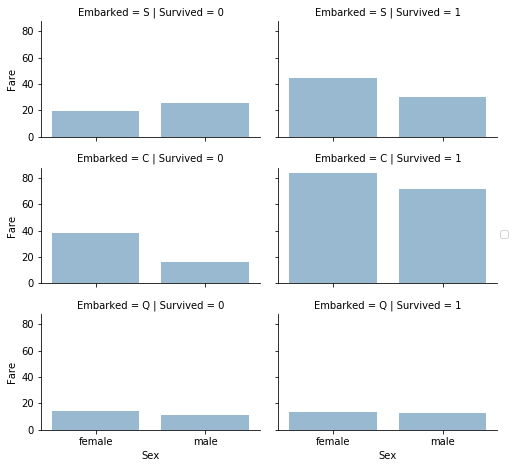

In [306]:
# 出航港、料金、性別と生存率の関連性
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [307]:
# 学習に使わないデータをデータフレームから削除
# チケット番号と客室番号は生存率と関係が低いとして削除する
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [308]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [309]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [310]:
# 名前と乗客IDを削除する前に名前のタイトル(MsとかMrとか)を抜き出してTitleカラムとして保存
# crosstabでカテゴリカルデータの集計結果を表示
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [311]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [312]:
# 上記のタイトルについて出現率が少ないものはRareとしてまとめてそれぞれの生存率を算出
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [313]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


カテゴリカルデータを数値データに変換

In [314]:
# それぞれを数値に変換、欠損値は0で補完
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [315]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [316]:
# 必要な情報は名前から抜き出せたので名前と乗客IDをデータフレームから削除
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [317]:
# 性別のデータを数値に変換
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [318]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


以降数値データの欠損値の補完
欠損値について他のデータを参考に値を推測して補完する方法をとる

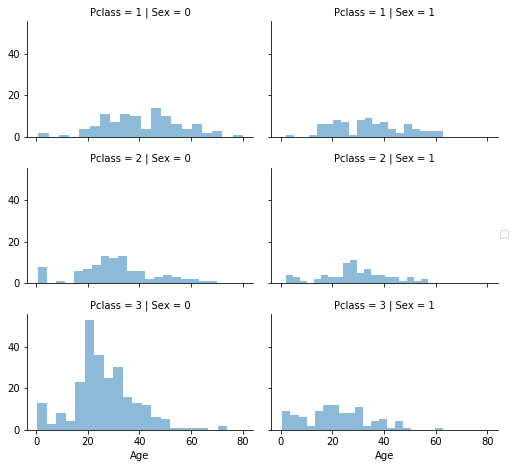

In [319]:
# チケットクラス、性別、年齢のヒストグラムを確認
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [320]:
# チケットクラスと性別から年齢の欠損値を推測
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [321]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [322]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1
5,0,3,0,25,0,0,8.4583,Q,1
6,0,1,0,54,0,0,51.8625,S,1
7,0,3,0,2,3,1,21.0750,S,4
8,1,3,1,27,0,2,11.1333,S,3
9,1,2,1,14,1,0,30.0708,C,3


In [323]:
# 年齢をpd.cutで分割ごとの離散値(AgeBand)に変換して生存率を比較
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [324]:
# 6歳以下の生存率が特に高いので6歳以下用のカラムを作成
for dataset in combine:
    dataset.loc[dataset['Age'] <= 6, 'IsChild'] = 1
    dataset.loc[dataset['Age'] > 6, 'IsChild'] = 0
    dataset['IsChild'] = dataset['IsChild'].astype(int)

In [325]:
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,IsChild
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]",0
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]",0


In [326]:
# 上記のAgeBandを0~3としてAgeカラムに上書き
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head(50)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,IsChild
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]",0
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]",0
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]",0
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]",0
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]",0
5,0,3,0,1,0,0,8.4583,Q,1,"(16.0, 32.0]",0
6,0,1,0,3,0,0,51.8625,S,1,"(48.0, 64.0]",0
7,0,3,0,0,3,1,21.0750,S,4,"(-0.08, 16.0]",1
8,1,3,1,1,0,2,11.1333,S,3,"(16.0, 32.0]",0
9,1,2,1,0,1,0,30.0708,C,3,"(-0.08, 16.0]",0


In [327]:
# AgeBandを削除
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,IsChild
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.322110,0.523008,0.381594,32.204208,1.728395,0.052750
std,0.486592,0.836071,0.477990,0.820081,1.102743,0.806057,49.693429,1.030039,0.223659
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,2.000000,0.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,5.000000,1.000000


In [328]:
# 兄弟・配偶者カラム(SibSp)と親・子(Parch)をまとめて、FamilySizeとして定義
# SibSpとParchを消すため
# 生存率との関連性を表示
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [329]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [330]:
# 新たなカラムとしてお一人様かどうか(IsAlone)を定義して生存率と比較
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [331]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [332]:
# IsAloneの方が使えそうなのでそっちを採用
# SibSp, Parch, Family sizeを削除
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Title,IsChild,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.322110,32.204208,1.728395,0.052750,1.904602,0.602694
std,0.486592,0.836071,0.477990,0.820081,49.693429,1.030039,0.223659,1.613459,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,7.910400,1.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,14.454200,1.000000,0.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,31.000000,2.000000,0.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,512.329200,5.000000,1.000000,11.000000,1.000000


In [333]:
# ファミリーサイズをバンド化
for dataset in combine:    
    dataset.loc[ dataset['FamilySize'] == 4, 'Family'] = 0
    dataset.loc[(dataset['FamilySize'] == 3) | (dataset['FamilySize'] == 2), 'Family'] = 1
    dataset.loc[(dataset['FamilySize'] == 7) | (dataset['FamilySize'] == 1), 'Family'] = 2
    dataset.loc[(dataset['FamilySize'] == 5) | (dataset['FamilySize'] == 6), 'Family'] = 3
    dataset.loc[ (dataset['FamilySize'] == 8) | (dataset['FamilySize'] == 11), 'Family'] = 4
    dataset['Family'] = dataset['Family'].astype(int)

In [334]:
train_df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.724138
1,1,0.562738
2,2,0.304189
3,3,0.162162
4,4,0.000000


In [335]:
train_df = train_df.drop(['FamilySize'], axis=1)
test_df = test_df.drop(['FamilySize'], axis=1)
combine = [train_df, test_df]

In [336]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsChild,IsAlone,Family
0,0,3,0,1,7.2500,S,1,0,0,1
1,1,1,1,2,71.2833,C,3,0,0,1
2,1,3,1,1,7.9250,S,2,0,1,2
3,1,1,1,2,53.1000,S,3,0,0,1
4,0,3,0,2,8.0500,S,1,0,1,2


In [337]:
# 年齢とチケットクラスを掛けたAge*Classを定義
# 年齢もチケットも数が少ない方が生存率が高いのでAge*Classも小さい方が生存率が高い
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [338]:
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


出航港データの変換

In [339]:
# もっとも出現率の高いデータを取得
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [340]:
# 2レコード欠損値があるのでそれについてはもっとも出現率の多いデータで補完
# 出航港と生存率の関連性
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [341]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [342]:
# 出航港データを数値データに変換
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [343]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsChild,IsAlone,Family,Age*Class
0,0,3,0,1,7.2500,0,1,0,0,1,3
1,1,1,1,2,71.2833,1,3,0,0,1,2
2,1,3,1,1,7.9250,0,2,0,1,2,3
3,1,1,1,2,53.1000,0,3,0,0,1,2
4,0,3,0,2,8.0500,0,1,0,1,2,6


料金についての変換

In [344]:
# testデータフレームに欠陥データが1レコードのみあるので中央値で補完
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsChild,IsAlone,Family,Age*Class
0,892,3,0,2,7.8292,2,1,0,1,2,6
1,893,3,1,2,7.0000,0,3,0,0,1,6
2,894,2,0,3,9.6875,2,1,0,1,2,6
3,895,3,0,1,8.6625,0,1,0,1,2,3
4,896,3,1,1,12.2875,0,3,0,0,1,3


In [345]:
# 年齢と同様に4つの要素で離散データ化(FareBand作成)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [346]:
# FareをFareBandで上書き
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [347]:
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [348]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsChild,IsAlone,Family,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.322110,1.505051,0.361392,1.728395,0.052750,0.602694,1.710438,2.765432
std,0.486592,0.836071,0.477990,0.820081,1.118148,0.635673,1.030039,0.223659,0.489615,0.664757,1.753320
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,3.000000
max,1.000000,3.000000,1.000000,4.000000,3.000000,2.000000,5.000000,1.000000,1.000000,4.000000,12.000000


In [354]:
# testデータフレームも同様に確認
# train_df = train_df.drop(['Title'], axis=1)
# test_df = test_df.drop(['Title'], axis=1)
# combine = [train_df, test_df]
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,IsChild,IsAlone,Family,Age*Class
0,892,3,0,2,0,0,1,2,6
1,893,3,1,2,0,0,0,1,6
2,894,2,0,3,1,0,1,2,6
3,895,3,0,1,1,0,1,2,3
4,896,3,1,1,1,0,0,1,3
5,897,3,0,0,1,0,1,2,0
6,898,3,1,1,0,0,1,2,3
7,899,2,0,1,2,0,0,1,2
8,900,3,1,1,0,0,1,2,3
9,901,3,0,1,2,0,0,1,3


--------------------

ここまででデータの前処置が終了

------------------

## ここからModelの学習  
- Logistic Regression  
- KNN or k-Nearest Neighbors  
- Support Vector Machines  
- Naive Bayes classifier  
- Decision Tree  
- Random Forrest  
- Perceptron  
- Artificial neural network  
- RVM or Relevance Vector Machine  

上記の全てで学習して比較

------------------------

In [355]:
# 学習用データの作成
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

-----------

以下それぞれのモデルで推測結果を算出

----------

In [356]:
# GridSearchを使用してRandom Forestを交差検証
parameters = {
    'n_estimators': [i for i in range(10, 20, 1)],
    'criterion': ['gini','entropy'],
    'max_depth': [i for i in range(1, 10, 1)],
    'min_samples_split': [2, 4, 10, 12, 16],
    'bootstrap': [True, False],
    'random_state': [1],
}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, Y_train)
predictor = clf.best_estimator_
best_score = clf.best_score_
best_params = clf.best_params_
print('best score: ', best_score, 'best params: ', best_params)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 2612 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 4712 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 7412 tasks      | elapsed:  1.3min


best score:  0.8204264870931538 best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 10, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 9000 out of 9000 | elapsed:  1.5min finished


In [236]:
# 交差検証のでテストデータを予測
random_pred = predictor.predict(X_test)

In [283]:
# Decision Tree

parameters = {
    'splitter': ['best', 'random'],
    'criterion': ['gini','entropy'],
    'max_depth': [i for i in range(1, 10, 1)],
    'min_samples_split': [2, 4, 10, 12, 16],
    'random_state': [1],
}
dec_clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
dec_clf.fit(X_train, Y_train)
dec_predictor = dec_clf.best_estimator_
best_score = dec_clf.best_score_
best_params = dec_clf.best_params_
decision_pred = dec_predictor.predict(X_test)
print('best score: ', best_score, 'best params: ', best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
best score:  0.8294051627384961 best params:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 10, 'random_state': 1, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    1.0s finished


In [286]:
# KNN

parameters = {
    'n_neighbors': [3, 5, 8, 11, 13, 16, 19, 21],
    'weights': ['uniform','distance'],
    'leaf_size':  list(range(1,50,5))
}
knn_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, n_jobs=-1, verbose=1)
knn_clf.fit(X_train, Y_train)
knn_predictor = knn_clf.best_estimator_
best_score = knn_clf.best_score_
best_params = knn_clf.best_params_
decision_pred = knn_predictor.predict(X_test)
print('best score: ', best_score, 'best params: ', best_params)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.0s


best score:  0.8305274971941639 best params:  {'leaf_size': 46, 'n_neighbors': 11, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    3.9s finished


In [253]:
# SVC

svc = SVC()
svc.fit(X_train, Y_train)
svc_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [254]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
log_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.82

In [264]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
lin_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.27

In [277]:
random_pred = random_pred.astype(int)
random_pred

array([0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [278]:
# 手動でアンサンブル学習
major = random_pred + decision_pred + knn_pred
Y_pred = np.where(major >= 3, 1, 0)
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [289]:
# 提出用CSVデータ作成
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": random_pred
    })
submission.to_csv('csv/submission21.csv', index=False)